In [1]:
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
strike1, dip1 = 10, 30
strike2, dip2 = 315, 78

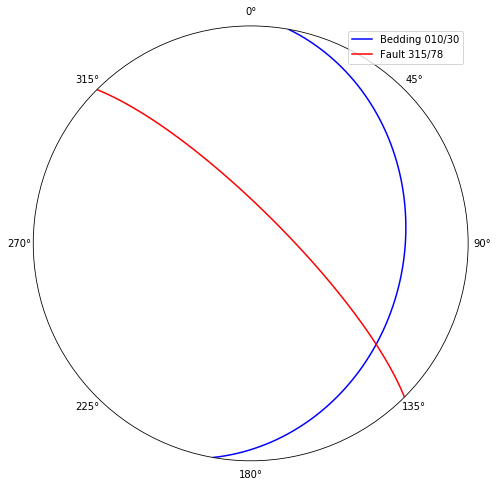

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.plane(strike1, dip1, c='b', label='Bedding %03d/%02d' % (strike1, dip1))
ax.plane(strike2, dip2, c='r', label='Fault %03d/%02d' % (strike2, dip2))
ax.legend()

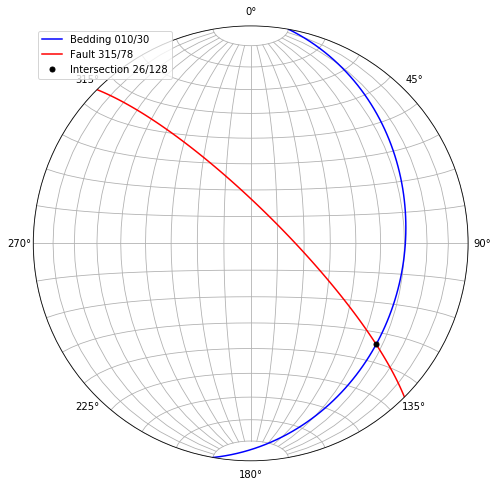

In [5]:
plunge, bearing = mplstereonet.plane_intersection(strike1, dip1, strike2, dip2)
ax.line(plunge, bearing, 'ko', markersize=5, 
        label='Intersection %02d/%03d' % (plunge, bearing))
ax.legend()
# We can also add a grid
ax.grid()
fig

In [6]:
fold_measurements = '''
    N 88 E, 16 N
    N 68 E, 30 NW
    N 60 E, 45 NW
    N 41 E, 50 SE
    N 35 E, 35 SE
    N 20 E, 20 E
'''

In [7]:
strikes, dips = zip(*[mplstereonet.parse_strike_dip(*s.strip().split(', ')) 
                      for s in fold_measurements.split('\n') if s])

strikes, dips

((268.0, 248.0, 240.0, 41.0, 35.0, 20.0), (16.0, 30.0, 45.0, 50.0, 35.0, 20.0))

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


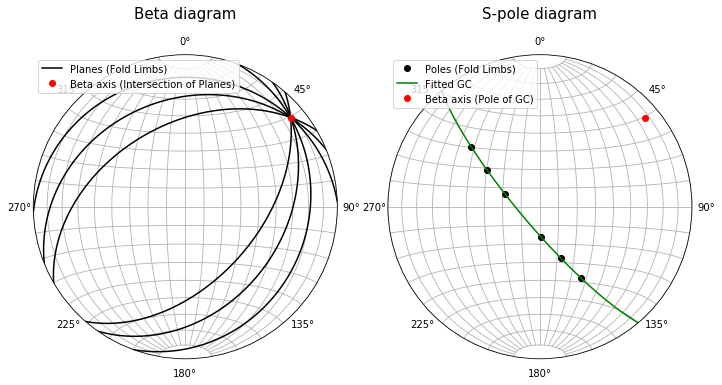

In [8]:
from collections import OrderedDict

fig = plt.figure(figsize=(10,5))

# Method 1

ax = fig.add_subplot(121, projection='stereonet')
ax.plane(strikes, dips, c='k', label='Planes (Fold Limbs)')
strike, dip = mplstereonet.fit_girdle(strikes, dips)
ax.pole(strike, dip, c='r', label='Beta axis (Intersection of Planes)')

# Method 2

ax = fig.add_subplot(122, projection='stereonet')
ax.pole(strikes, dips, c='k', label='Poles (Fold Limbs)')
ax.plane(strike, dip, c='g', label='Fitted GC')
ax.pole(strike, dip, c='r', label='Beta axis (Pole of GC)')

for ax, title in zip(fig.axes[1::2], ['Beta diagram', 'S-pole diagram']):
    ax.set_title(title, y=1.10, fontsize=15)
    ax.grid()

    # This will avoid repetition in the legend:
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))

    ax.legend(by_label.values(), by_label.keys(), loc='upper left')

fig.tight_layout()

In [9]:
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
strikes = np.concatenate([np.random.randint(0, 360, 60),
                          np.random.randint(10, 60, 20),
                          np.random.randint(190, 300, 20),
                          np.random.randint(60, 90, 20),
                         ])

dips = np.concatenate([np.random.randint(0, 90, 60),
                       np.random.randint(60, 90, 60),
                         ])

In [11]:
bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)

In [12]:
number_of_strikes[0] += number_of_strikes[-1]

In [13]:
half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

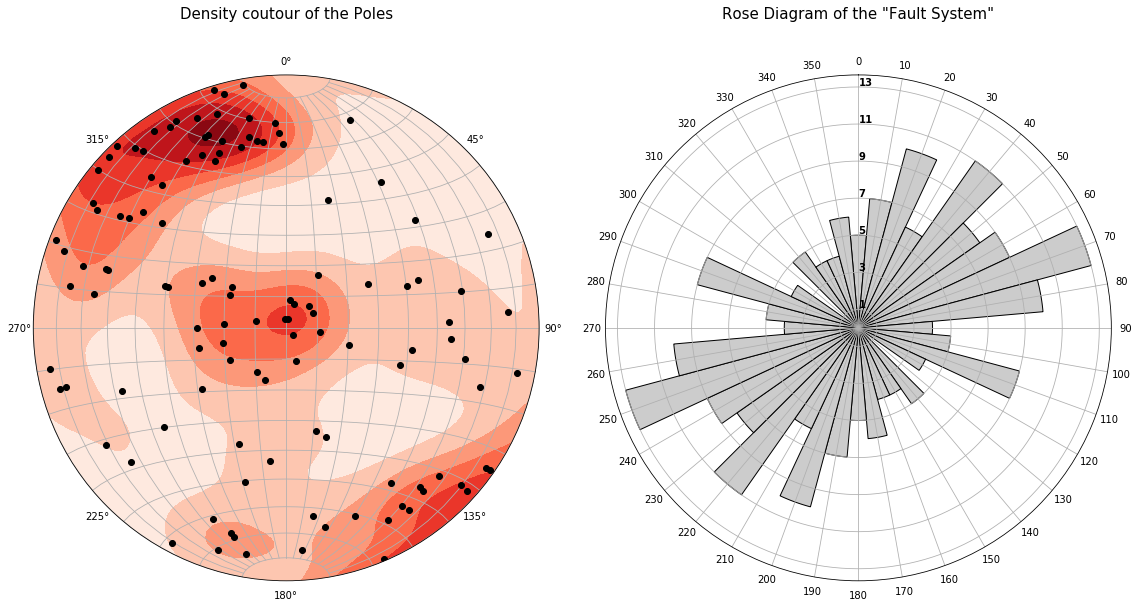

In [14]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(121, projection='stereonet')

ax.pole(strikes, dips, c='k', label='Pole of the Planes')
ax.density_contourf(strikes, dips, measurement='poles', cmap='Reds')
ax.set_title('Density coutour of the Poles', y=1.10, fontsize=15)
ax.grid()

ax = fig.add_subplot(122, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Rose Diagram of the "Fault System"', y=1.10, fontsize=15)

fig.tight_layout()

Copyright (c) 2017, Bruno Ruas de Pinho